EX2: Image processing: Convert RGB to Gray

In [ ]:
!gdown 1i9dqan21DjQoG5Q_VEvm0LrVwAlXD0vB

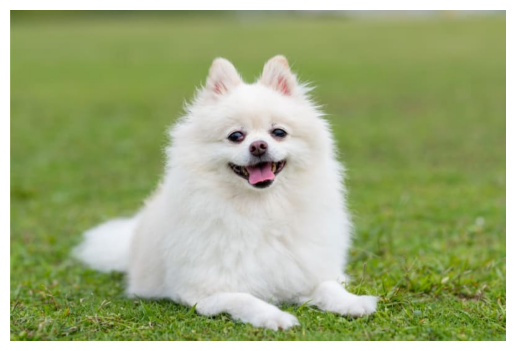

In [16]:
import matplotlib.image as mping
import matplotlib.pyplot as plt

image = mping.imread("dog.jpeg", 1)

plt.imshow(image)
plt.axis('off')  
plt.show()

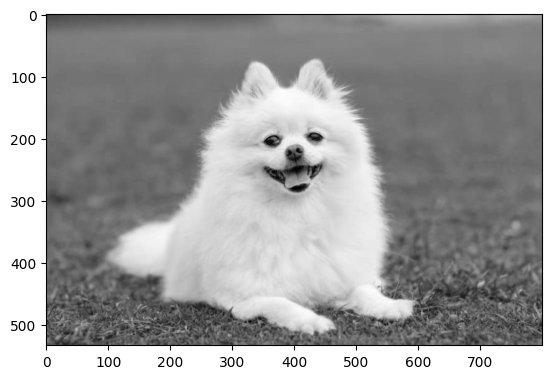

102.5


In [23]:
# Lightness

import numpy as np

def color_2_grayscale(vector):
    return np.max(vector)*0.5 + np.min(vector)*0.5

gray_image_01 = np.apply_along_axis(color_2_grayscale, axis=2, arr=image)
plt.imshow(gray_image_01, cmap=plt.get_cmap("gray"))
plt.show()
print(gray_image_01[0, 0])

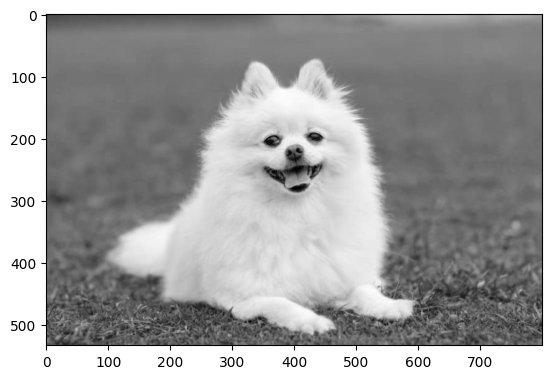

107.66666666666667


In [24]:
# Average

import numpy as np

def color_2_grayscale(vector):
    return np.sum(vector) / 3

gray_image_02 = np.apply_along_axis(color_2_grayscale, axis=2, arr=image)
plt.imshow(gray_image_01, cmap=plt.get_cmap("gray"))
plt.show()
print(gray_image_02[0, 0])

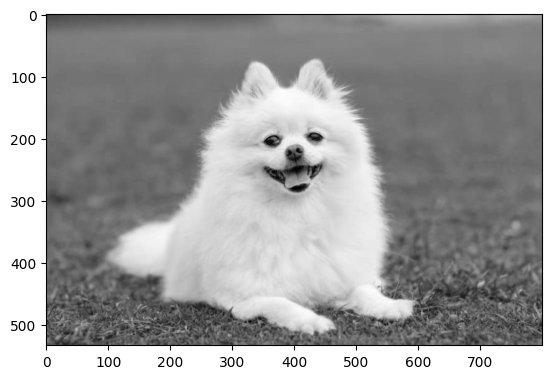

124.97


In [25]:
# Luminosity

import numpy as np

def color_2_grayscale(vector):
    return vector[0]*0.21 + vector[1]*0.7 + vector[2]*0.09

gray_image_03 = np.apply_along_axis(color_2_grayscale, axis=2, arr=image)
plt.imshow(gray_image_01, cmap=plt.get_cmap("gray"))
plt.show()
print(gray_image_03[0, 0])

EX3: Phân tích dữ liệu dạng bảng

In [36]:
!gdown 1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq 

Downloading...
From: https://drive.google.com/uc?id=1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq
To: d:\AIO-2024-EX\M02-Calculus and Linear Algegra, and theirs Applications to AI\Week01\advertising.csv

  0%|          | 0.00/4.06k [00:00<?, ?B/s]
100%|██████████| 4.06k/4.06k [00:00<00:00, 1.96MB/s]


In [41]:
import pandas as pd
import numpy as np

df = pd.read_csv("advertising.csv")
data = df.to_numpy()

print(data[:5])

[[230.1  37.8  69.2  22.1]
 [ 44.5  39.3  45.1  10.4]
 [ 17.2  45.9  69.3  12. ]
 [151.5  41.3  58.5  16.5]
 [180.8  10.8  58.4  17.9]]


In [48]:
#  Lấy giá trị lớn nhất và chỉ mục tương ứng của nó trên cột Sales:

# pd
max_sale =df["Sales"].max()
max_index = df["Sales"].idxmax()
print((max_index, max_sale))

# np
data_sales = data[:, 3]
sale_max = np.max(data_sales)
idx_max = np.argmax(data_sales)
print((idx_max, sale_max))

(175, 27.0)
(175, 27.0)


In [55]:
#  Giá trị trung bình của cột TV

# pd
# avg_value = df["TV"].sum() / len(df["TV"])
avg_value = df["TV"].mean()
print(avg_value)

# np
data_TV = data[:, 0]
TV_avg = dat_TV.mean()
# TV_avg = np.sum(data_TV) / len(data_TV)
print(TV_avg)

147.0425
147.0425


In [77]:
# Số lượng bản ghi có giá trị tại cột Sales lớn hơn hoặc bằng 20

# pd
value_greater_than_20 = df["Sales"] >= 20
value_greater_than_20.sum()

# np
greater_than_20 = data[:, 3] >= 20
np.sum(greater_than_20)

40

In [69]:
#  Tính giá trị trung bình của cột Radio thoả mãn điều kiện giá trị tương ứng trên cột Sales lớn hơn hoặc bằng 15

# pd
sales = df["Sales"] >= 15
radios = df["Radio"]
radios_following_sales = radios[sales]
radios_mean = radios_following_sales.mean()
radios_mean

# np
sales_np = data[:, 3] >= 15
radios_np = data[:, 1]
radios_np_following_sales = radios_np[sales_np]
radios_np_mean = np.mean(radios_following_sales)
radios_np_mean 

26.22293577981651

In [73]:
#  Tính tổng các hàng của cột Sales với điều kiện giá trị Newspaper lớn hơn giá trị trung bình của cột Newspaper

# pd
newspapers = df["Newspaper"] >= df["Newspaper"].mean()
sales = df["Sales"]
sales_following_newspapers = sales[newspapers]
sum_sales = sales_following_newspapers.sum()
sum_sales

# np
newspapers_np = data[:, 2] >= np.mean(data[:, 2])
sales_np = data[0:, 3]
sales_np_following_newpapers = sales_np[newspapers]
sum_sales_np = np.sum(sales_np_following_newpapers)
sum_sales_np

1405.1

In [80]:
sales = df["Sales"]
mean_sales = sales.mean()
scores = sales.apply(lambda x: 'Good' if x > mean_sales else 'Bad' if x < mean_sales else 'Average')
scores = scores.to_list()
scores[7:10]

['Bad', 'Bad', 'Good']

In [93]:
mean_sales = df['Sales'].mean()

A = df['Sales'].iloc[(df['Sales'] - mean_sales).abs().argsort()[0]] # tra ve phan tu dau tien
A = df['Sales'].iloc[(df['Sales'] - mean_sales).abs().argmin()] # tra ve phan tu nho nhat
A = df['Sales'].iloc[(df['Sales'] - mean_sales).abs().argsort()[:]].values[0] # tra ve 1 danh sach cac phan tu, lay gia tri dau tien

scores = df['Sales'].apply(lambda x: 'Good' if x > A else 'Bad' if x < A else 'Average')

scores = scores.tolist()

print(scores[7:10])

['Bad', 'Bad', 'Good']
